In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as cPickle
import gzip

data = gzip.open("mnist.pkl.gz")
train_data,  validation_data, test_data = cPickle.load(data,encoding="latin1")
X=train_data[0]
X=X.T
Y=train_data[1]
Y=Y.T
print(X.shape)
print(Y.shape)
Y=Y.reshape(1,Y.shape[0])
print(Y.shape)
Y=np.squeeze(Y)
n_Y=np.max(Y)+1
y=np.eye(n_Y)[Y]
Y=y.T
print(Y.shape)
print(np.argmax(Y,axis=0))

(784, 50000)
(50000,)
(1, 50000)
(10, 50000)
[5 0 4 ..., 8 4 8]


In [2]:
def softmax(x):
    t=np.exp(x)
    q=np.sum(t,axis=0,keepdims=True)
    return t/q

In [3]:
def initialise_parameters(X,Y):
    W=np.random.randn(Y.shape[0],X.shape[0])*0.01
    b=np.zeros((Y.shape[0],1))
    return W,b

In [4]:
def forward_prop(W, b, X):
    Z=np.dot(W,X)+b
    A=softmax(Z)
    return A

In [5]:
def compute_cost(Y, A):
    m=Y.shape[1]
    cost=np.sum(-1*(Y*np.log(A)))/Y.shape[1]
    return cost

In [6]:
def update(W, A, X, Y, b, lr):
    m = Y.shape[1]
    dZ = A - Y
    dW = np.dot(dZ, X.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    W -= lr*dW
    b -= lr*db
    return W, b

In [7]:
def accuracy(X,W,b,Y):
    Q=np.argmax(Y,axis=0)
    R=forward_prop(W,b,X)
    R=np.argmax(R,axis=0)
    count=0
    for i in range(Y.shape[1]):
        if Q[i]==R[i]:
            count+=1
    accuracy=count/Y.shape[1]*100
    return accuracy

In [8]:
def model(X,Y,num_iterations,learning_rate):
    costs= []
    acc =[]
    W,b=initialise_parameters(X,Y)
    for i in range(num_iterations):
        A=forward_prop(W,b,X)
        cost=compute_cost(Y,A)
        acc.append(accuracy(X,W,b,Y))
        W,b=update(W, A, X, Y, b,learning_rate)
        costs.append(cost)
        if i%100==0:
            print("After iteration %i cost: %f and accuracy:%f" %(i,cost,accuracy(X,W,b,Y)))
    
    return W,b,costs,acc

In [9]:
W,b,costs,accuracies=model(X,Y,num_iterations=1000,learning_rate=0.1)

After iteration 0 cost: 2.306910 and accuracy:36.924000
After iteration 100 cost: 0.617589 and accuracy:85.940000
After iteration 200 cost: 0.496520 and accuracy:87.606000
After iteration 300 cost: 0.446617 and accuracy:88.386000
After iteration 400 cost: 0.417839 and accuracy:88.916000
After iteration 500 cost: 0.398539 and accuracy:89.312000
After iteration 600 cost: 0.384426 and accuracy:89.560000
After iteration 700 cost: 0.373512 and accuracy:89.788000
After iteration 800 cost: 0.364735 and accuracy:89.964000
After iteration 900 cost: 0.357470 and accuracy:90.138000


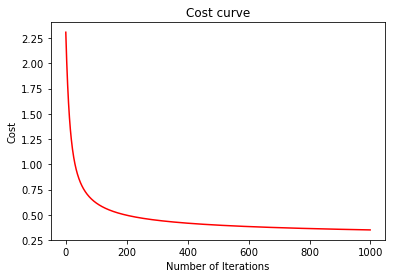

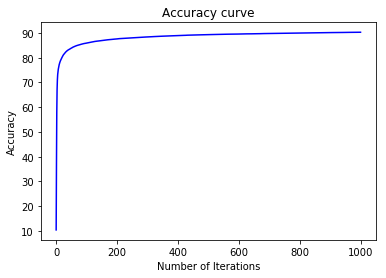

In [10]:
plt.plot(costs,color="red")
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost curve')
plt.show()
plt.plot(accuracies,color="blue")
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy curve')
plt.show()

In [11]:
train_accuracy=accuracy(X,W,b,Y)

In [12]:
print("Final Accuracy on training set :",train_accuracy,"%")    

Final Accuracy on training set : 90.274 %


In [13]:
X_test = test_data[0]
X_test = X_test.T
Y_test=test_data[1]
Y_test=Y_test.T
Y_test=Y_test.reshape(1,Y_test.shape[0])
print(Y_test.shape)
Y_test=np.squeeze(Y_test)
n_Y=np.max(Y_test)+1
y=np.eye(n_Y)[Y_test]
Y_test=y.T
print(Y_test.shape)
print(np.argmax(Y_test,axis=0))

(1, 10000)
(10, 10000)
[7 2 1 ..., 4 5 6]


In [14]:
test_accuracy=accuracy(X_test,W,b,Y_test)
print("Accuracy on Test set : ",test_accuracy,"%")

Accuracy on Test set :  91.0 %


In [16]:
def predict(X,W,b):
    A=forward_prop(W,b,X)
    A=np.argmax(A,axis=0)
    return A

It is a  1


/home/rishi/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/home/rishi/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


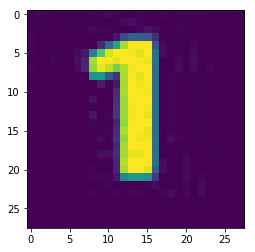

In [21]:
import scipy
from scipy import ndimage
from PIL import Image
img = Image.open('1.jpg').convert('L')
img.save('greyscale-1.png')
fname="greyscale-1.png"
image = np.array(ndimage.imread(fname, flatten=False))
#print(image.shape)
image = scipy.misc.imresize(image, size=(28,28)).reshape((28*28,1))
#print(image.shape)
c=predict(image,W,b)
print("It is a ",np.squeeze(c))
plt.imshow(img)
plt.show()

It is a  2


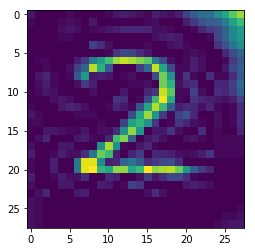

In [20]:
img = Image.open('2.jpg').convert('L')
img.save('greyscale-2.png')
fname="greyscale-2.png"
image = np.array(ndimage.imread(fname, flatten=False))
#print(image.shape)
image = scipy.misc.imresize(image, size=(28,28)).reshape((28*28,1))
#print(image.shape)
c=predict(image,W,b)
print("It is a ",np.squeeze(c))
plt.imshow(img)
plt.show()